In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline

In [2]:
# Duomenų importavimas

data = pd.read_csv('Book11.csv')

In [3]:
# 161 pasaulio miestų ir vidutinės cost of living 55 rodiklių kainos eurais 2020 sausio mėnesį

data

,Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.70,0.90,1.88,...,1.57,2.63,1.58,3.06,2.20,1.78,9.42,15221.84,1250.41,12874.09
156,"Perth, Australia",12.43,56.55,7.32,5.90,5.59,1.79,1.62,1.03,1.76,...,1.26,2.86,1.96,2.40,2.11,1.29,9.49,15239.20,1190.12,11526.08
157,"Sydney, Australia",11.81,54.37,7.15,4.97,4.97,1.99,1.68,0.90,1.85,...,1.59,2.48,1.65,3.01,2.17,1.72,11.24,15066.62,1389.43,11933.55
158,"Alexandria, Egypt",2.81,14.06,3.38,1.69,2.81,0.32,0.19,0.81,0.51,...,0.20,1.45,0.66,0.39,0.66,0.31,8.37,23071.86,55.41,2132.54


In [3]:
# Pervadinu Unnamed į Location

data = data.rename(columns={"Unnamed: 0": "Location"})

In [ ]:
data

In [5]:
# Duomenų pagrindinės statistinės charakteristikos

data.describe()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.967187,35.768625,5.634250,3.257625,3.702938,1.261187,0.935125,0.998938,1.197875,1.902812,...,0.995187,2.391625,1.583188,1.809750,1.355937,1.076562,9.599437,20497.003687,447.470187,8039.567875
std,4.474586,18.878654,2.036808,2.140890,1.949165,0.723930,0.627407,0.391720,0.760670,0.752520,...,0.484362,0.994821,0.964584,1.080635,0.481411,0.648750,4.964241,6037.691697,421.356658,5972.758905
min,1.490000,7.590000,2.670000,0.780000,1.200000,0.290000,0.140000,0.390000,0.100000,0.750000,...,0.200000,0.670000,0.520000,0.350000,0.480000,0.250000,4.150000,11163.690000,37.060000,788.020000
25%,4.647500,20.925000,4.110000,1.665000,2.200000,0.647500,0.385000,0.710000,0.555000,1.377500,...,0.610000,1.537500,0.930000,1.050000,1.057500,0.547500,6.747500,17439.037500,176.375000,3666.565000
50%,6.285000,30.555000,5.095000,2.365000,3.080000,1.140000,0.810000,0.895000,1.020000,1.850000,...,0.910000,2.145000,1.225000,1.495000,1.250000,0.920000,8.690000,18868.595000,281.015000,6460.615000
75%,11.472500,49.637500,7.000000,4.812500,4.845000,1.750000,1.375000,1.170000,1.690000,2.352500,...,1.270000,3.132500,1.905000,2.455000,1.662500,1.420000,11.195000,21409.800000,572.902500,10511.532500
max,23.120000,109.160000,12.970000,11.130000,11.130000,3.870000,3.210000,2.640000,3.330000,5.330000,...,2.580000,5.210000,5.700000,5.760000,3.500000,3.400000,46.090000,67345.100000,2194.640000,34441.930000


In [6]:
# Visų stulpelių pavadinimai

data.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle).1', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of C

In [4]:
# Išskaidau Location į miestą ir šalį

new = data["Location"].str.split(",", n = 1, expand = True) 
data["City"]= new[0] 
data["Country"]= new[1] 

# Pašalinu tarpą prieš šalies pavadinimą
data['Country'] = data['Country'].str.strip()

In [8]:
# Šalių sąrašas

data["Country"].unique()

array(['Russia', 'Turkey', 'Finland', 'Moldova', 'Italy', 'Egypt',
       'Bosnia And Herzegovina', 'Azerbaijan', 'Mexico', 'Nepal',
       'Vietnam', 'Ukraine', 'Canada', 'Tunisia', 'Netherlands', 'Serbia',
       'France', 'Bulgaria', 'Greece', 'Germany', 'Lebanon',
       'TX, United States', 'Singapore', 'New Zealand', 'Montenegro',
       'Japan', 'MA, United States', 'IL, United States', 'Kazakhstan',
       'Norway', 'Slovakia', 'Croatia', 'Poland', 'Latvia', 'Chile',
       'Kenya', 'United Arab Emirates', 'Georgia', 'Colombia',
       'Czech Republic', 'NV, United States', 'United Kingdom',
       'CA, United States', 'Panama', 'South Korea', 'Malaysia',
       'NY, United States', 'Denmark', 'Slovenia', 'India', 'Sri Lanka',
       'Lithuania', 'AZ, United States', 'Hong Kong', 'OR, United States',
       'Portugal', 'China', 'South Africa', 'Albania', 'Hungary', 'Spain',
       'Peru', 'WA, United States', 'Romania', 'Uzbekistan', 'Estonia',
       'Qatar', 'Austria', 'Urugu

In [5]:
# Pašalinu valstijas iš šalies pavadinimo

data["Country"] = data["Country"].replace(['TX, United States', 'MA, United States', 'IL, United States', 'NV, United States',
                                           'CA, United States', 'NY, United States', 'AZ, United States', 'OR, United States',
                                           'WA, United States'],'United States')

In [ ]:
# Noriu išsiaiškinti ar Vilnius yra brangus miestas, todėl pagal numbeo.com pateiktą metodiką apskaičiuoju indeksus, kurių
# reikės skaičiuojant vidutines išlaidas

In [10]:
data["Clothing And Shoes index"] = (data["1 Pair of Jeans (Levis 501 Or Similar)"] + 
                                    data["1 Summer Dress in a Chain Store (Zara, H&M, ...)"] +
                                    data["1 Pair of Nike Running Shoes (Mid-Range)"] + 
                                    data["1 Pair of Men Leather Business Shoes"])*0.35

data["Markets index"] = (data["Bottle of Wine (Mid-Range)"]*4 + (data["Domestic Beer (0.5 liter bottle)"] + 
                         data["Imported Beer (0.33 liter bottle)"])*6 + data["Onion (1kg)"]*10 + data["Local Cheese (1kg)"]*12 +
                         data["Rice (white), (1kg)"]*14 + (data["Cigarettes 20 Pack (Marlboro)"] +
                         data["Chicken Breasts (Boneless, Skinless), (1kg)"] + 
                         data["Beef Round (1kg) (or Equivalent Back Leg Red Meat)"])*15 + data["Lettuce (1 head)"]*18 +
                         data["Eggs (regular) (12)"]*20 + data["Tomato (1kg)"]*22 + data["Potato (1kg)"]*24 + 
                         (data["Milk (regular), (1 liter)"] + data["Banana (1kg)"])*25 + (data["Oranges (1kg)"] + 
                         data["Water (1.5 liter bottle)"])*30 + data["Apples (1kg)"]*31 + 
                         data["Loaf of Fresh White Bread (500g)"]*31)

data["Rent index"] = (data["Apartment (1 bedroom) in City Centre"] + data["Apartment (1 bedroom) Outside of Centre"] + 
                     data["Apartment (3 bedrooms) in City Centre"] + data["Apartment (3 bedrooms) Outside of Centre"])*0.25

data["Restaurants index"] = (data["Cappuccino (regular)"]*15 + data["Meal, Inexpensive Restaurant"]*16 + 
                            data["Meal for 2 People, Mid-range Restaurant, Three-course"]*3.5 + 
                            data["McMeal at McDonalds (or Equivalent Combo Meal)"]*6 + 
                            data["Domestic Beer (0.5 liter draught)"]*5 + data["Imported Beer (0.33 liter bottle)"]*5 +
                            data["Coke/Pepsi (0.33 liter bottle)"]*6 + data["Water (0.33 liter bottle) "]*6)

data["Sports And Leisure index"] = (data["Tennis Court Rent (1 Hour on Weekend)"]*3 + 
                                    data["Fitness Club, Monthly Fee for 1 Adult"]*2.3 +
                                    data["Cinema, International Release, 1 Seat"]*6)

data["Transportation index"] = (data["Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)"]*0.0035 + 
                                data["Gasoline (1 liter)"]*60 + data["Monthly Pass (Regular Price)"]*1.5 + 
                                data["Volkswagen Golf"]*0.0035 + data["Taxi 1hour Waiting (Normal Tariff)"]*0.7 +
                                data["Taxi 1km (Normal Tariff)"]*20 + data["Taxi Start (Normal Tariff)"]*5 + 
                                data["One-way Ticket (Local Transport)"]*20)

data["Utilities index"] = (data["Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment"] + 
                           data["1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)"]*320 +
                           data["Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)"])

data["BasketConsumerPlusRent"] = (data["Clothing And Shoes index"] + data["Markets index"] + data["Rent index"] +
                                  data["Restaurants index"] + data["Sports And Leisure index"] + data["Transportation index"] +
                                  data["Utilities index"])

In [11]:
# Skaičiavimas reikalingi New York keli skaičiai

data.loc[data['Location'] == "New York, NY, United States"]

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,City,Country,Clothing And Shoes index,Markets index,Rent index,Restaurants index,Sports And Leisure index,Transportation index,Utilities index,BasketConsumerPlusRent
78,"New York, NY, United States",17.97,76.37,8.09,6.29,7.19,1.85,1.59,1.04,3.33,...,New York,United States,94.773,1881.98,3382.99,754.695,330.772,459.44037,200.63,7105.28037


In [12]:
NY_Groceries = 1881.98
NY_Cost_of_Living_Plus_Rent = 7105.28037

data["Groceries Index"] = data["Markets index"]/NY_Groceries
data["Cost of Living Plus Rent index"] = data["BasketConsumerPlusRent"]/NY_Cost_of_Living_Plus_Rent

In [13]:
data.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Clothing And Shoes index,Markets index,Rent index,Restaurants index,Sports And Leisure index,Transportation index,Utilities index,BasketConsumerPlusRent,Groceries Index,Cost of Living Plus Rent index
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,99.9985,610.63,624.1100,305.705,146.251,266.551380,118.73,2171.975880,0.324461,0.305685
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,60.8825,601.45,332.4375,213.160,127.630,292.505545,108.73,1736.795545,0.319584,0.244437
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,52.7170,539.09,229.9200,163.670,100.842,281.583930,92.76,1460.582930,0.286448,0.205563
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,111.3980,1134.62,1208.8850,619.100,237.602,483.287695,127.37,3922.262695,0.602886,0.552021
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,95.3890,495.80,295.4900,209.790,128.712,204.578375,144.44,1574.199375,0.263446,0.221553


In [ ]:
# Kokios yra vidutinės išlaidos per mėnesį pagal šalį? Ir ar užtenka vidutinio atlyginimo toms išlaidoms?

In [ ]:
# Apskaičiuoju vidutines išlaidas 2 žmonėms:
# 10% iš visų valgymų valgo restoranuose, iš jų 50% nebrangiuose, geria kavą ne namuose, kartą per savaitę eina į kiną
# nerūko, vartoja alkoholį, turi mašiną ir su ja pakankamai dažnai važiuoja, kitas narys turi mėnesinį viešojo transporto
# bilietą, abu sportuoja ir nuomojasi 1 miegamojo butą ne centre

In [14]:
data["Clothing and Shoes"] = (data["1 Pair of Jeans (Levis 501 Or Similar)"] + 
                              data["1 Summer Dress in a Chain Store (Zara, H&M, ...)"] +
                              data["1 Pair of Nike Running Shoes (Mid-Range)"] + 
                              data["1 Pair of Men Leather Business Shoes"])*0.20

data["Restaurants"] = (data["Cappuccino (regular)"]*12.4 + data["Meal, Inexpensive Restaurant"]*4.34 + 
                       data["Meal for 2 People, Mid-range Restaurant, Three-course"]*3.1 + 
                       data["McMeal at McDonalds (or Equivalent Combo Meal)"]*1.86 + 
                       data["Domestic Beer (0.5 liter draught)"]*0.775 + data["Imported Beer (0.33 liter bottle)"]*0.775 + 
                       data["Coke/Pepsi (0.33 liter bottle)"]*2.325 + data["Water (0.33 liter bottle) "]*2.325)

data["Going out"] = (data["Cappuccino (regular)"]*7 + data["Domestic Beer (0.5 liter draught)"]*1.05 + 
                     data["Imported Beer (0.33 liter bottle)"]*1.05 + data["Coke/Pepsi (0.33 liter bottle)"]*1.05 + 
                     data["Water (0.33 liter bottle) "]*1.05 + data["Cinema, International Release, 1 Seat"]*4.2)

data["Food at Home"] = (data["Onion (1kg)"]*5.7866667 + data["Local Cheese (1kg)"]*5.7866667 + 
                        data["Rice (white), (1kg)"]*5.7866667 + data["Chicken Breasts (Boneless, Skinless), (1kg)"]*8.68 + 
                        data["Beef Round (1kg) (or Equivalent Back Leg Red Meat)"]*8.68 + data["Lettuce (1 head)"]*11.5733333 +
                        data["Eggs (regular) (12)"]*11.5733333 + data["Tomato (1kg)"]*11.5733333 + 
                        data["Potato (1kg)"]*11.5733333 + data["Milk (regular), (1 liter)"]*14.4666667 + 
                        data["Banana (1kg)"]*14.4666667 + data["Oranges (1kg)"]*17.36 + data["Apples (1kg)"]*17.36 + 
                        data["Loaf of Fresh White Bread (500g)"]*14.4666667)

data["Drinks at Home"] = (data["Bottle of Wine (Mid-Range)"]*0.7678571 + data["Domestic Beer (0.5 liter bottle)"]*5.1190476 + 
                          data["Imported Beer (0.33 liter bottle)"]*1.0238095 + data["Water (1.5 liter bottle)"]*15)

data["Car and Gasoline"] = (data["Gasoline (1 liter)"]*120 + data["Volkswagen Golf"]*0.013)

data["Public Transport and Taxi"] = (data["Monthly Pass (Regular Price)"]*1)

data["Leisure and Sport Memberships"] = (data["Tennis Court Rent (1 Hour on Weekend)"]*2 + 
                                         data["Fitness Club, Monthly Fee for 1 Adult"]*2)

data["Utilities"] = (data["Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment"]*0.7380952 + 
                     data["1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)"]*40 +
                     data["Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)"])
        
data["Rent"] = data["Apartment (1 bedroom) Outside of Centre"] 

data["Other Goods and Services"] = (((data["Groceries Index"]/1.5)*100) + 10 + 60 + 
                                    (data["Cost of Living Plus Rent index"]/1.5)*100)

data["Overall estimate monthly spending"] = (data["Clothing and Shoes"] + data["Restaurants"] + data["Going out"] + 
                                             data["Food at Home"] + data["Drinks at Home"] + data["Car and Gasoline"] + 
                                             data["Public Transport and Taxi"] + data["Leisure and Sport Memberships"] + 
                                             data["Utilities"] + data["Rent"] + data["Other Goods and Services"])
# Ar ar apskaičiuotų išlaidų dviems žmonės užtenka jų dviejų vidutinių atlyginimų?
data["Is avarage salary enough"] = data["Average Monthly Net Salary (After Tax)"]*2 - data["Overall estimate monthly spending"]


In [15]:
# Suapvalinu iki šimtųjų

data = data.round(2)

In [16]:
# Apskaičiuoju vidutines išlaidas pagal šalį

Vid_islaidos = data.groupby('Country').mean()[['Overall estimate monthly spending', 'Is avarage salary enough']]

In [17]:
# Brangiausios ir pigiausios šalys pagal apskaičiuotas išlaidas

Vid_islaidos.sort_values(by='Overall estimate monthly spending', ascending=False)

,Overall estimate monthly spending,Is avarage salary enough
Country,,
Switzerland,4372.800000,7056.800000
Singapore,3830.550000,2145.690000
Iceland,3769.660000,2048.060000
Hong Kong,3634.840000,1140.480000
Norway,3609.180000,2362.580000
...,...,...
Egypt,1080.080000,-694.440000
Tunisia,1061.480000,-489.900000
Georgia,1032.770000,-536.630000


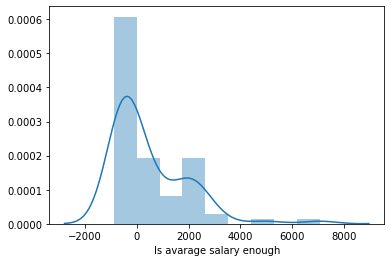

In [18]:
# Kaip pasiskirsčiusios šalys pagal tai ar užtenka vidutinio atlyginimo išlaidoms

sns.distplot(data.groupby('Country').mean()['Is avarage salary enough'])

In [ ]:
#Paanalizuokim tik Europą

In [6]:
Europa = data[data['Country'].isin(['Russia', 'Turkey', 'Finland', 'Moldova', 'Italy', 'Bosnia And Herzegovina', 'Ukraine',
                                     'Netherlands', 'Serbia', 'France', 'Bulgaria', 'Greece', 'Germany', 'Montenegro', 'Norway',
                                      'Slovakia', 'Croatia', 'Poland', 'Latvia', 'Czech Republic', 'Denmark', 'Slovenia',
                                     'Lithuania', 'Portugal', 'Albania', 'Hungary', 'Spain', 'Romania', 'Estonia', 'Austria',
                                     'Macedonia', 'Sweden', 'Belarus', 'Ireland', 'Switzerland', 'Belgium'])]

In [20]:
# Vidutinės išlaidos pagal šalį

Vid_islaidos_eur = Europa.groupby('Country').mean()[['Overall estimate monthly spending', 'Is avarage salary enough']]
vid1 = Vid_islaidos_eur.sort_values(by='Overall estimate monthly spending', ascending=True)
vid2 = Vid_islaidos_eur.sort_values(by='Is avarage salary enough', ascending=False)

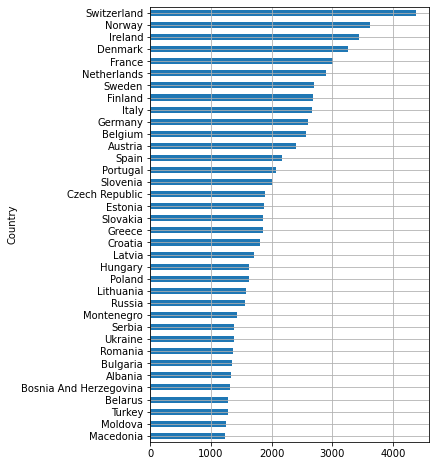

In [21]:
# Europos šalys nuo brangiausio iki pigiausio pragyvenimo

vid1['Overall estimate monthly spending'].plot(kind="barh",figsize=(5,8), grid=True)

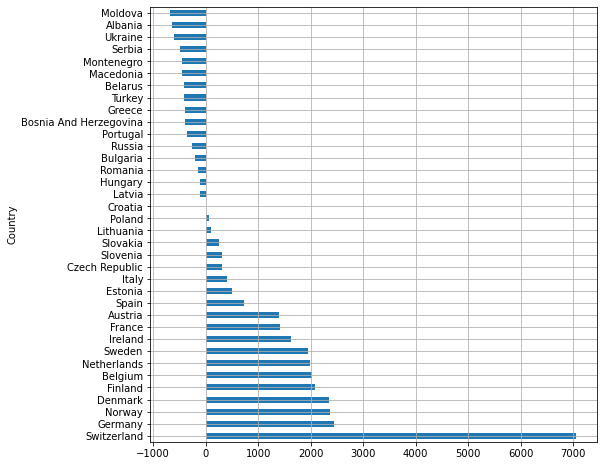

In [22]:
# Europos šalys pagal tai kiek trūkta/lieka po išlaidų
# 16 šalių dviejų vidutinių atlyginimų apskaičiuotoms išlaidoms neuženka, o 19 dar lieka.

vid2['Is avarage salary enough'].plot(kind="barh",figsize=(8,8),grid=True)

In [ ]:
# Ar Vilnius yra brangus miestas? Ir ar užtenka dviems žmonėms vidutinių atlyginimų išlaidoms?

In [23]:
# Surūšiuoju miestus nuo brangiausio

data = data.sort_values(by='Overall estimate monthly spending', ascending=False)
data = data.set_index(np.arange(len(data.index)))

In [24]:
# Išsirenku išlaidas kategorijoms

Monthly_spending = data[["Location", "Restaurants", "Going out", "Food at Home", "Drinks at Home", "Car and Gasoline",
                         "Public Transport and Taxi", "Leisure and Sport Memberships", "Utilities", "Clothing and Shoes",
                         "Rent", "Other Goods and Services", "Overall estimate monthly spending", 
                         "Average Monthly Net Salary (After Tax)", "Is avarage salary enough", "Country"]]

In [25]:
# Iš 160 pasaulio miestų Vilnius pagal branguma yra 90 vietoje, išlaidos sudarytų 1619 eur ir dviejų vidutinių algų užtenka
# toms išlaidoms 

Monthly_spending[Monthly_spending['Country'].isin(['Lithuania'])]

,Location,Restaurants,Going out,Food at Home,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Clothing and Shoes,Rent,Other Goods and Services,Overall estimate monthly spending,Average Monthly Net Salary (After Tax),Is avarage salary enough,Country
90,"Vilnius, Lithuania",185.24,53.28,270.87,23.49,371.5,29.0,92.00,99.75,51.29,329.77,112.79,1618.98,912.37,205.76,Lithuania
98,"Kaunas, Lithuania",164.67,52.77,293.21,26.48,375.6,28.0,91.42,102.94,53.50,246.21,113.13,1547.93,771.00,-5.93,Lithuania


In [26]:
# Brangiausi pasaulio miestai (iš turimų 160)

Monthly_spending[0:11]

,Location,Restaurants,Going out,Food at Home,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Clothing and Shoes,Rent,Other Goods and Services,Overall estimate monthly spending,Average Monthly Net Salary (After Tax),Is avarage salary enough,Country
0,"San Francisco, CA, United States",378.80,103.37,710.98,54.25,371.43,72.78,187.78,157.88,61.20,2527.11,196.96,4822.54,6532.21,8241.88,United States
1,"Zurich, Switzerland",494.42,122.32,1191.21,41.02,477.49,78.59,218.46,179.32,87.20,1263.69,219.07,4372.80,5714.80,7056.80,Switzerland
2,"New York, NY, United States",400.56,107.70,815.54,59.36,340.36,114.11,194.28,144.88,54.16,1788.76,203.33,4223.04,4665.46,5107.88,United States
3,"Singapore, Singapore",231.77,79.65,512.21,57.85,1175.79,79.96,195.00,106.63,54.04,1174.57,163.08,3830.55,2988.12,2145.69,Singapore
4,"Boston, MA, United States",329.01,98.89,669.52,50.88,336.47,80.81,134.72,153.17,46.78,1716.68,176.82,3793.74,4132.08,4470.42,United States
5,"Reykjavik, Iceland",511.90,98.93,697.03,57.56,535.24,93.15,174.88,130.69,88.95,1203.14,178.19,3769.66,2908.86,2048.06,Iceland
6,"Hong Kong, Hong Kong",240.88,91.79,641.71,48.01,611.10,56.96,151.64,154.91,59.25,1405.71,172.87,3634.84,2387.66,1140.48,Hong Kong
7,"Seattle, WA, United States",330.90,98.74,671.14,50.90,392.81,88.95,150.90,168.46,53.02,1450.04,175.19,3631.04,4741.65,5852.26,United States
8,"Oslo, Norway",432.29,114.10,726.28,62.03,648.15,75.83,143.12,165.98,71.82,990.78,178.80,3609.18,2985.88,2362.58,Norway
9,"Los Angeles, CA, United States",319.92,100.71,578.41,49.86,369.60,89.79,94.68,142.80,47.89,1564.78,167.46,3525.90,3968.48,4411.06,United States


In [27]:
# Pigiausi pasaulio miestai (iš turimų 160)

Monthly_spending[150:160]

,Location,Restaurants,Going out,Food at Home,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Clothing and Shoes,Rent,Other Goods and Services,Overall estimate monthly spending,Average Monthly Net Salary (After Tax),Is avarage salary enough,Country
150,"Tashkent, Uzbekistan",86.93,26.47,206.27,10.73,277.13,13.48,61.04,59.55,39.67,124.02,96.82,1002.10,205.98,-590.14,Uzbekistan
151,"Pune, India",84.75,32.90,212.37,23.30,268.08,12.66,42.34,31.77,30.10,127.68,100.60,966.55,531.09,95.63,India
152,"Delhi, India",95.09,33.33,194.92,22.97,244.42,12.66,57.28,48.30,29.92,123.19,100.00,962.10,473.80,-14.50,India
153,"Bangalore, India",82.20,34.02,204.65,23.16,265.68,15.82,50.36,29.24,27.04,124.18,100.54,956.87,579.22,201.57,India
154,"Ahmedabad, India",64.72,29.67,203.86,23.11,249.05,5.06,52.20,43.12,25.76,149.35,99.13,945.03,303.54,-337.95,India
155,"Chandigarh, India",71.15,28.97,217.90,28.05,249.49,6.35,50.12,55.74,32.03,88.87,101.46,930.12,380.27,-169.58,India
156,"Noida, India",83.94,30.81,186.10,22.41,244.42,12.66,65.98,57.48,29.54,94.92,98.02,926.28,536.67,147.06,India
157,"Chennai, India",57.82,25.68,197.90,21.57,265.68,12.66,46.42,37.95,23.81,98.51,98.33,886.34,403.82,-78.70,India
158,"Hyderabad, India",61.82,23.70,196.75,22.31,267.32,12.02,50.24,25.95,25.35,92.66,98.37,876.50,441.12,5.74,India
159,"Kolkata, India",73.78,29.06,174.90,22.47,255.05,3.16,44.50,29.87,26.22,79.35,96.28,834.65,323.06,-188.53,India


In [ ]:
#Europoje:

In [28]:
# Surūšiuoju miestus nuo brangiausio

Europa = Europa.sort_values(by='Overall estimate monthly spending', ascending=False)
Europa = Europa.set_index(np.arange(len(Europa.index)))

In [29]:
Monthly_spending_eur = Europa[["Location", "Restaurants", "Going out", "Food at Home", "Drinks at Home", "Car and Gasoline",
                         "Public Transport and Taxi", "Leisure and Sport Memberships", "Utilities", "Clothing and Shoes",
                         "Rent", "Other Goods and Services", "Overall estimate monthly spending", 
                         "Average Monthly Net Salary (After Tax)", "Is avarage salary enough", "Country"]]

In [ ]:
# 72 Europos miestai

In [30]:
# Europoje iš 72 duomenų faile esu miestų Vilnius pagal brangumą yta 40 vietoje, Kaunas 43

Monthly_spending_eur[Monthly_spending_eur['Country'].isin(['Lithuania'])]

,Location,Restaurants,Going out,Food at Home,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Clothing and Shoes,Rent,Other Goods and Services,Overall estimate monthly spending,Average Monthly Net Salary (After Tax),Is avarage salary enough,Country
40,"Vilnius, Lithuania",185.24,53.28,270.87,23.49,371.5,29.0,92.00,99.75,51.29,329.77,112.79,1618.98,912.37,205.76,Lithuania
43,"Kaunas, Lithuania",164.67,52.77,293.21,26.48,375.6,28.0,91.42,102.94,53.50,246.21,113.13,1547.93,771.00,-5.93,Lithuania


In [31]:
#Brangiauisi Europos miestai

Monthly_spending_eur[0:11]

,Location,Restaurants,Going out,Food at Home,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Clothing and Shoes,Rent,Other Goods and Services,Overall estimate monthly spending,Average Monthly Net Salary (After Tax),Is avarage salary enough,Country
0,"Zurich, Switzerland",494.42,122.32,1191.21,41.02,477.49,78.59,218.46,179.32,87.20,1263.69,219.07,4372.80,5714.80,7056.80,Switzerland
1,"Oslo, Norway",432.29,114.10,726.28,62.03,648.15,75.83,143.12,165.98,71.82,990.78,178.80,3609.18,2985.88,2362.58,Norway
2,"Dublin, Ireland",322.30,88.22,443.43,48.38,484.80,125.00,112.32,189.24,58.80,1405.38,157.57,3435.45,2531.16,1626.87,Ireland
3,"Amsterdam, Netherlands",337.29,86.29,500.92,27.59,530.76,97.00,124.62,172.54,69.88,1195.63,153.96,3296.49,2646.66,1996.83,Netherlands
4,"Copenhagen, Denmark",429.21,116.44,537.61,35.93,614.89,53.53,134.72,184.41,74.35,919.12,156.15,3256.36,2803.98,2351.60,Denmark
5,"Paris, France",300.91,89.25,684.16,34.90,466.70,75.00,120.06,160.44,69.90,837.76,167.43,3006.50,2215.02,1423.54,France
6,"Utrecht, Netherlands",336.92,82.13,494.73,26.85,498.20,90.00,97.34,184.13,70.75,791.90,147.75,2820.70,2214.18,1607.66,Netherlands
7,"Munich, Germany",307.90,84.77,466.41,21.40,464.10,66.00,110.54,217.20,63.52,873.39,145.19,2820.40,2627.51,2434.62,Germany
8,"Stockholm, Sweden",334.96,97.67,549.50,47.57,443.41,84.51,129.04,88.80,67.71,804.10,152.29,2799.56,2476.17,2152.78,Sweden
9,"Eindhoven, Netherlands",304.17,81.83,483.88,25.91,517.19,72.00,86.70,164.64,59.92,838.00,144.01,2778.25,2603.84,2429.43,Netherlands


In [32]:
#Pigiausi Europos miestai

Monthly_spending_eur[62:72]

,Location,Restaurants,Going out,Food at Home,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Clothing and Shoes,Rent,Other Goods and Services,Overall estimate monthly spending,Average Monthly Net Salary (After Tax),Is avarage salary enough,Country
62,"Iasi, Romania",121.00,36.92,242.06,17.24,346.87,16.74,73.78,94.56,40.77,202.65,104.98,1297.57,529.52,-238.53,Romania
63,"Plovdiv, Bulgaria",115.60,37.07,254.06,16.16,370.23,20.42,72.06,76.00,40.67,179.23,104.93,1286.43,514.73,-256.97,Bulgaria
64,"Minsk, Belarus",160.25,34.38,247.84,21.34,260.40,13.48,94.52,50.08,52.34,244.90,105.63,1285.17,433.37,-418.43,Belarus
65,"Varna, Bulgaria",117.96,38.47,265.90,15.21,373.26,20.42,65.24,72.16,37.19,170.63,105.63,1282.07,511.50,-259.07,Bulgaria
66,"Banja Luka, Bosnia And Herzegovina",110.45,21.35,246.74,14.66,359.58,22.48,60.16,129.44,47.62,159.73,104.14,1276.35,430.69,-414.97,Bosnia And Herzegovina
67,"Ankara, Turkey",98.03,31.75,255.60,21.22,442.98,22.92,60.62,58.82,32.52,125.32,104.08,1253.86,440.17,-373.52,Turkey
68,"Chisinau, Moldova",112.21,34.28,234.59,17.03,329.96,9.33,77.48,95.12,54.51,177.96,102.33,1244.79,286.95,-670.89,Moldova
69,"Bursa, Turkey",83.91,30.66,269.57,21.75,424.33,22.95,63.22,67.52,30.20,121.74,105.16,1241.02,443.85,-353.32,Turkey
70,"Skopje, Macedonia",102.03,32.52,233.41,15.92,352.72,24.37,61.08,98.28,43.33,168.07,102.73,1234.46,393.01,-448.44,Macedonia
71,"Izmir, Turkey",82.03,29.94,245.79,20.20,442.56,22.92,64.62,54.18,30.12,128.36,102.80,1223.53,392.07,-439.39,Turkey


In [ ]:
# Toliau imsiu tik Europos miestus ir šalis

In [ ]:
# Ar koreliuoja vidutinis atlyginimas ir kainos?

In [ ]:
# Kadangi yra 55 kainos, tai jas išsirinsiu pagal kategorijas

In [33]:
# Drabužiai ir batai

Clothing_And_Shoes = Europa[["1 Pair of Jeans (Levis 501 Or Similar)", "1 Summer Dress in a Chain Store (Zara, H&M, ...)",
                             "1 Pair of Nike Running Shoes (Mid-Range)", "1 Pair of Men Leather Business Shoes",
                             "Average Monthly Net Salary (After Tax)"]]

In [ ]:
Clothing_And_Shoes.corr()

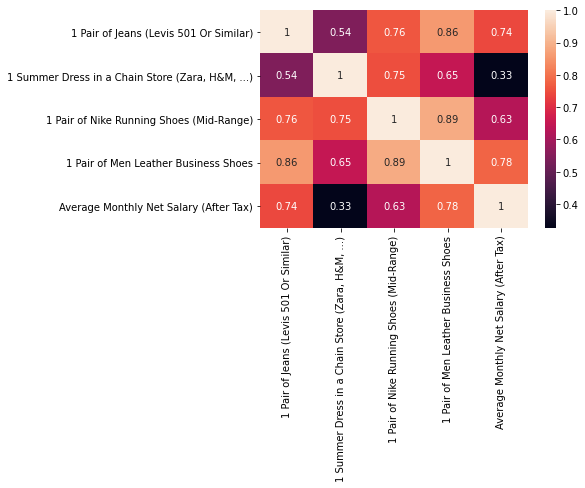

In [34]:
# Vidutinio atlyginimo ir vasarinės suknelės kainos tiesinė priklausomybė silpna, bėgimo batelių - vidutinė,
# o džinsų ir vyriškų batų - stipri

sns.heatmap(Clothing_And_Shoes.corr(), annot=True)

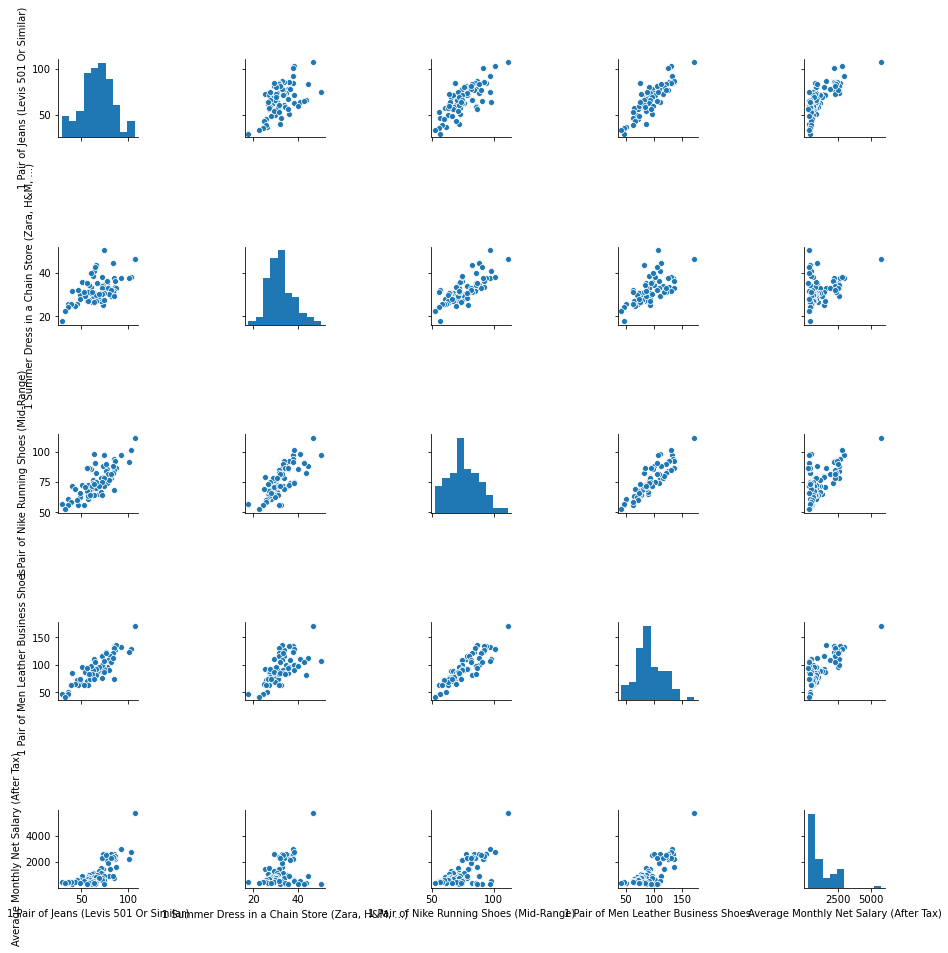

In [35]:
sns.pairplot(Clothing_And_Shoes)

In [9]:
# Maisto prekės

Markets = Europa[["Bottle of Wine (Mid-Range)", "Domestic Beer (0.5 liter bottle)", "Imported Beer (0.33 liter bottle)",
                "Onion (1kg)", "Local Cheese (1kg)", "Rice (white), (1kg)", "Cigarettes 20 Pack (Marlboro)", 
                "Chicken Breasts (Boneless, Skinless), (1kg)", "Beef Round (1kg) (or Equivalent Back Leg Red Meat)",
                "Lettuce (1 head)", "Eggs (regular) (12)", "Tomato (1kg)", "Potato (1kg)", "Milk (regular), (1 liter)", 
                "Banana (1kg)", "Oranges (1kg)", "Water (1.5 liter bottle)", "Apples (1kg)", "Loaf of Fresh White Bread (500g)",
                "Average Monthly Net Salary (After Tax)"]].copy()

In [37]:
Markets.corr()

,Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Onion (1kg),Local Cheese (1kg),"Rice (white), (1kg)",Cigarettes 20 Pack (Marlboro),"Chicken Breasts (Boneless, Skinless), (1kg)",Beef Round (1kg) (or Equivalent Back Leg Red Meat),Lettuce (1 head),Eggs (regular) (12),Tomato (1kg),Potato (1kg),"Milk (regular), (1 liter)",Banana (1kg),Oranges (1kg),Water (1.5 liter bottle),Apples (1kg),Loaf of Fresh White Bread (500g),Average Monthly Net Salary (After Tax)
Bottle of Wine (Mid-Range),1.000000,0.896286,0.861617,0.500152,0.455098,0.631061,0.644062,0.624759,0.631571,0.723733,0.621073,0.616695,0.535256,0.593085,0.645277,0.585876,0.767814,0.588820,0.701870,0.597826
Domestic Beer (0.5 liter bottle),0.896286,1.000000,0.855478,0.488071,0.391798,0.638748,0.660746,0.538456,0.550019,0.631769,0.579990,0.522594,0.526280,0.512992,0.700573,0.479149,0.721835,0.547697,0.632979,0.532725
Imported Beer (0.33 liter bottle),0.861617,0.855478,1.000000,0.696564,0.601005,0.813678,0.799721,0.723262,0.674222,0.781428,0.747127,0.756911,0.708069,0.647665,0.765739,0.694189,0.803769,0.780767,0.857728,0.736859
Onion (1kg),0.500152,0.488071,0.696564,1.000000,0.855119,0.727295,0.798464,0.908321,0.850552,0.722593,0.824323,0.786494,0.962640,0.541145,0.789437,0.853572,0.531639,0.917698,0.809257,0.893077
Local Cheese (1kg),0.455098,0.391798,0.601005,0.855119,1.000000,0.652765,0.600584,0.872375,0.841544,0.672637,0.761454,0.734084,0.847482,0.600018,0.695960,0.799777,0.410808,0.839354,0.698923,0.798311
"Rice (white), (1kg)",0.631061,0.638748,0.813678,0.727295,0.652765,1.000000,0.705631,0.778332,0.700226,0.730728,0.741917,0.768257,0.777567,0.643382,0.809461,0.760188,0.661595,0.811883,0.820726,0.799580
Cigarettes 20 Pack (Marlboro),0.644062,0.660746,0.799721,0.798464,0.600584,0.705631,1.000000,0.728577,0.634100,0.643266,0.758189,0.757274,0.835345,0.500000,0.670571,0.703785,0.718166,0.800673,0.786689,0.818129
"Chicken Breasts (Boneless, Skinless), (1kg)",0.624759,0.538456,0.723262,0.908321,0.872375,0.778332,0.728577,1.000000,0.939518,0.805695,0.884574,0.807642,0.903588,0.693595,0.784451,0.892377,0.634849,0.880373,0.832109,0.913008
Beef Round (1kg) (or Equivalent Back Leg Red Meat),0.631571,0.550019,0.674222,0.850552,0.841544,0.700226,0.634100,0.939518,1.000000,0.755318,0.847862,0.705005,0.844768,0.636813,0.792629,0.806334,0.507426,0.803309,0.760538,0.848111
Lettuce (1 head),0.723733,0.631769,0.781428,0.722593,0.672637,0.730728,0.643266,0.805695,0.755318,1.000000,0.668932,0.848408,0.692976,0.580506,0.659776,0.801174,0.769241,0.767991,0.886563,0.794171


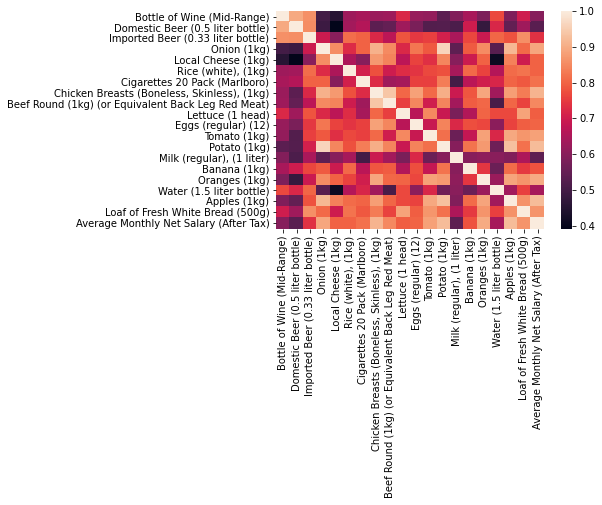

In [38]:
# Stipri koreliacija su svogūnų, cigarečių, vištos krūtinėlės, maltos jautienos, kiaušinių, pomidorų, bulvių, apelsinų,
# obuolių, duonuos kainomis

sns.heatmap(Markets.corr())

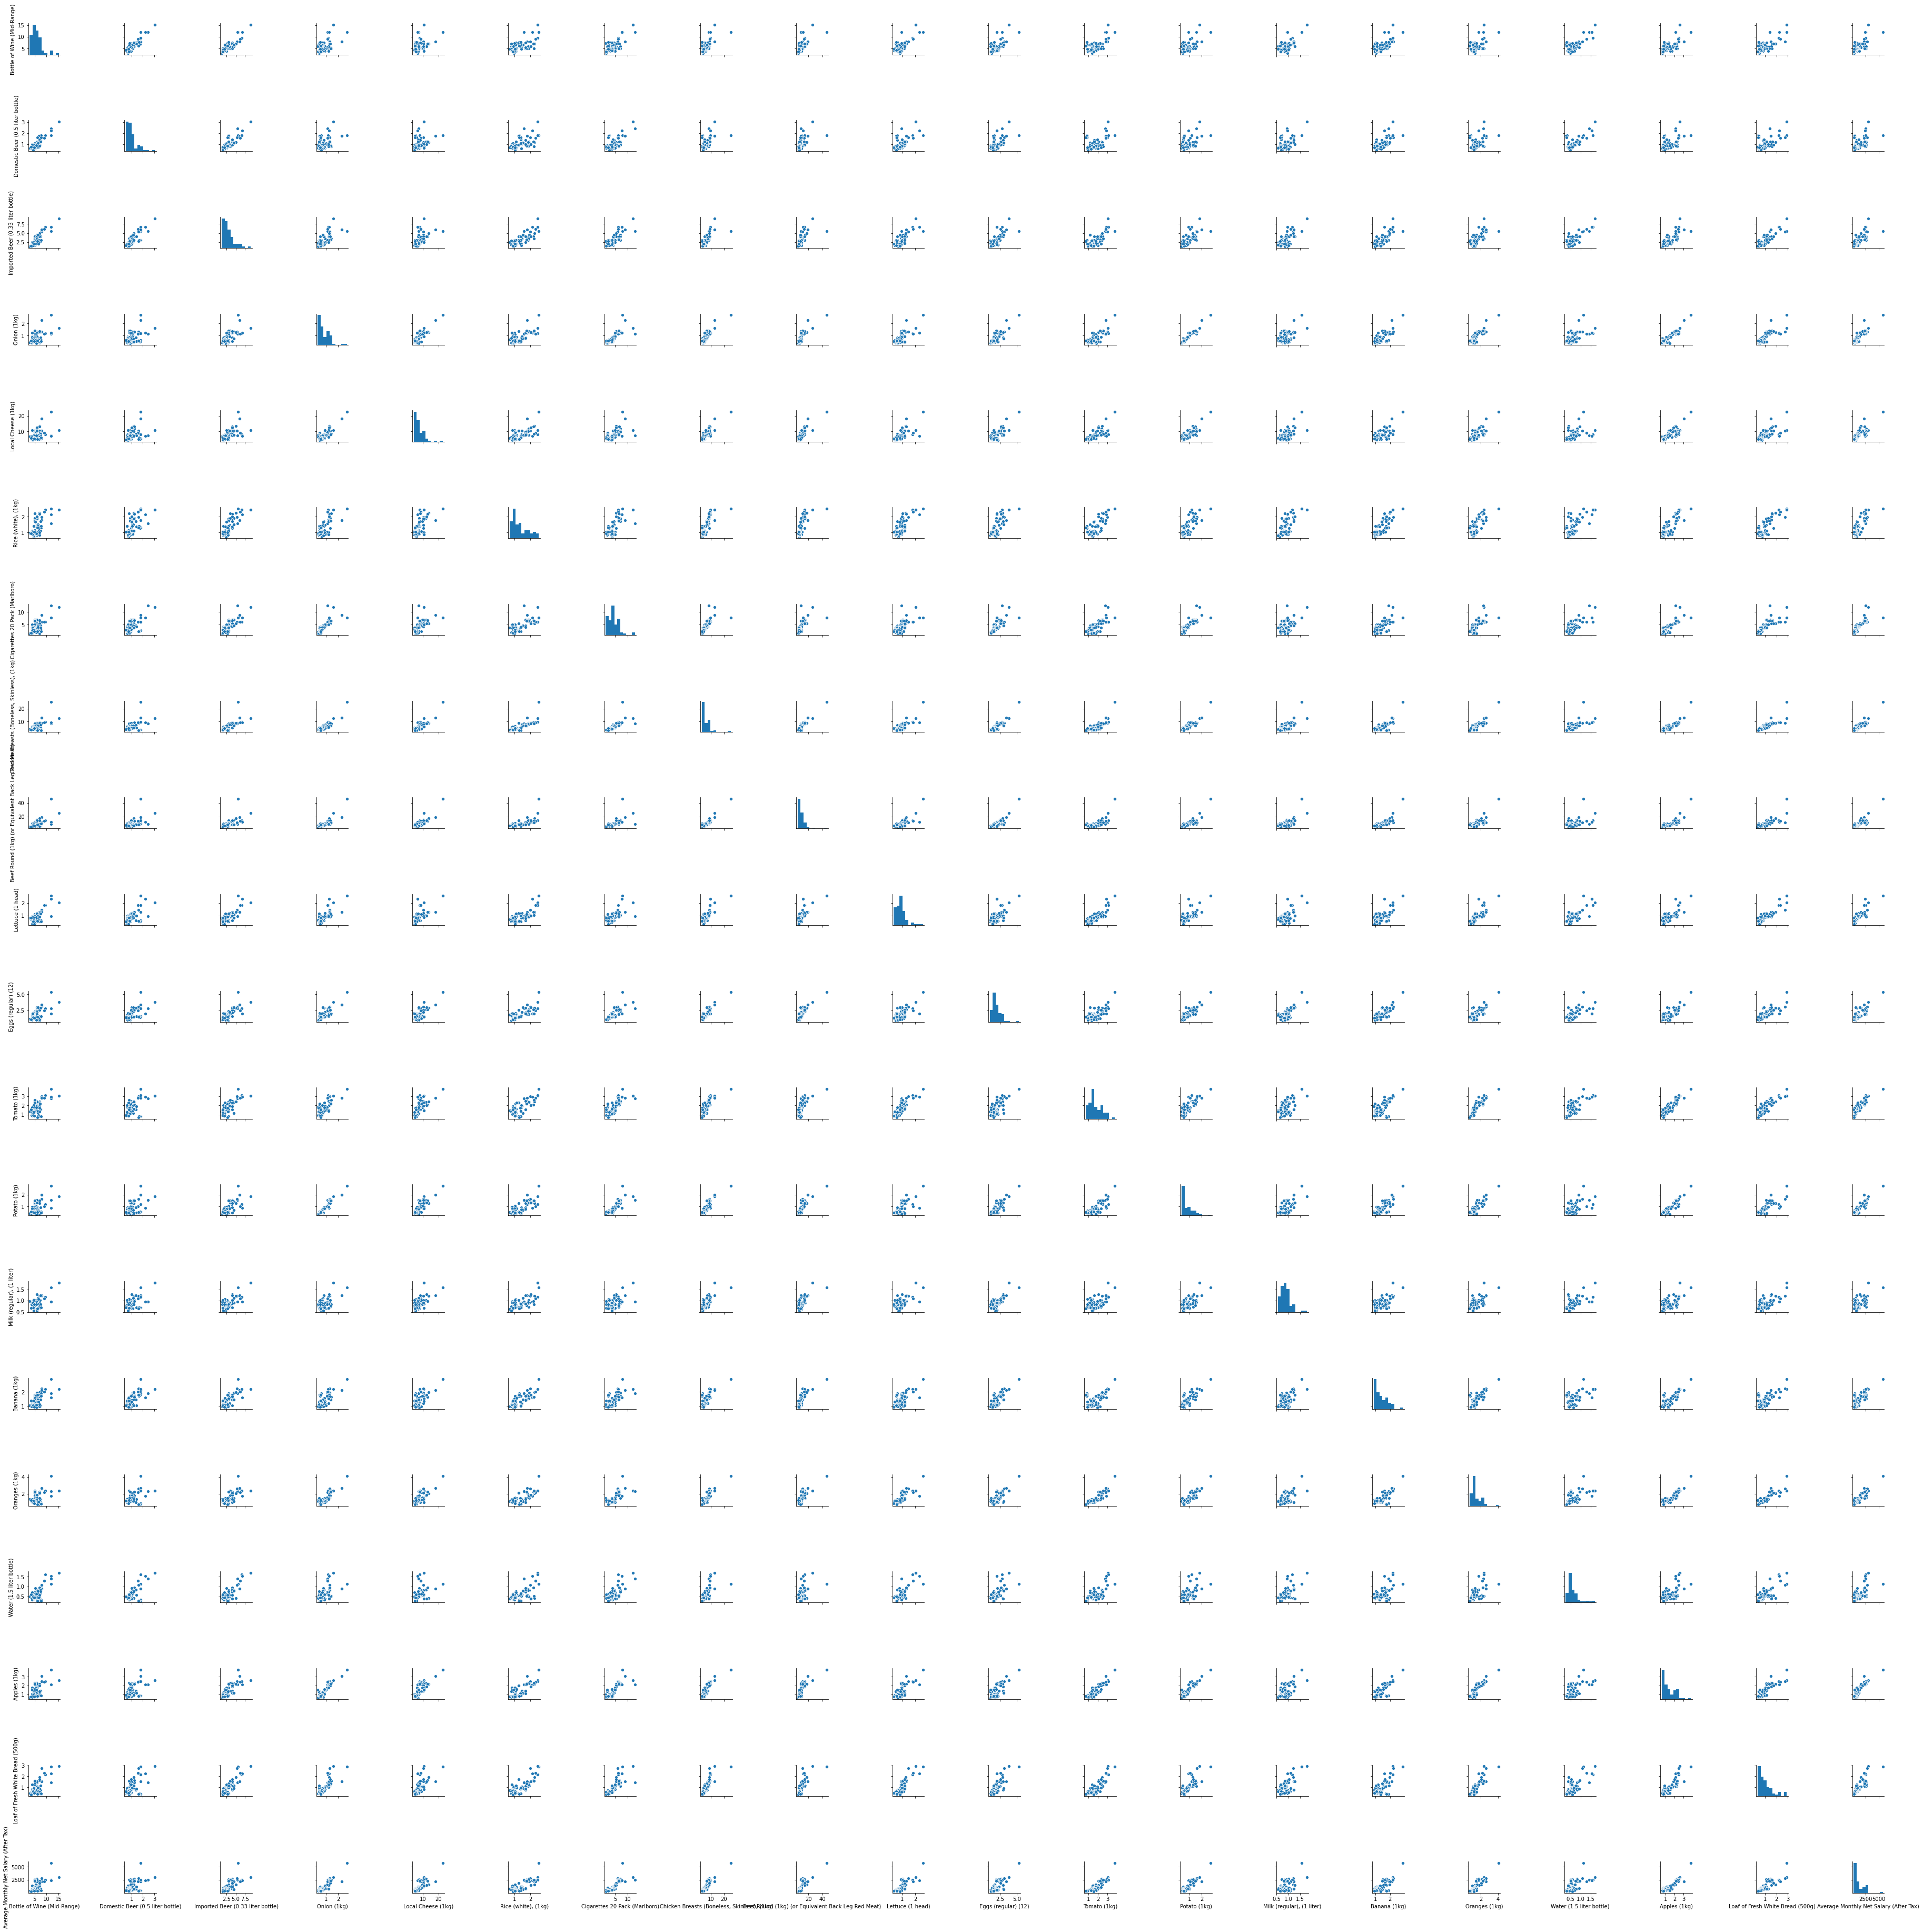

In [39]:
sns.pairplot(Markets)

In [ ]:
# Kadangi bulvių kainos stipriai tiesiškai priklauso nuo vidutinio atlygino, tai kiek vidutiniškai kinta bulvių kainos kintant 
# vidutiniam atlyginimui?

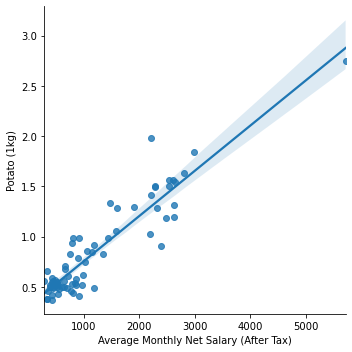

In [40]:
sns.lmplot(x="Average Monthly Net Salary (After Tax)", y="Potato (1kg)", data=Markets)

In [10]:
Markets["Potato"] = Markets["Potato (1kg)"]
Markets["Salary"] = Markets["Average Monthly Net Salary (After Tax)"]      

model = smf.ols(formula="Potato ~ Salary", data=Markets).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Potato   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           3.67e-31
Time:                        21:11:25   Log-Likelihood:                 22.759
No. Observations:                  72   AIC:                            -41.52
Df Residuals:                      70   BIC:                            -36.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3046      0.034      8.957      0.0

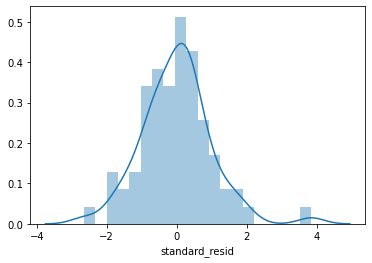

In [42]:
from statsmodels.stats.outliers_influence import OLSInfluence

std_res = OLSInfluence(model).summary_frame()

# Standartizuotų liekanų (liekamųjų paklaidų) pasiskirstymas
sns.distplot(std_res["standard_resid"], bins=20)

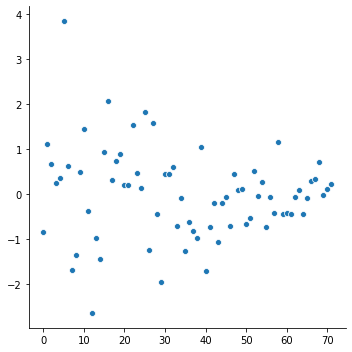

In [43]:
# Standartizuotų liekanų sklaidos diagrama
sns.relplot(data=std_res["standard_resid"])

In [ ]:
model.summary()

In [45]:
# Parametrų pasikliautinieji intervalai

model.conf_int(alpha=0.05)

,0,1
Intercept,0.236750,0.372378
Salary,0.000406,0.000494


In [46]:
# Hipotezė apie koeficiento b lygybę nuliui (priklausomybė tarp Y ir X)
model.pvalues

# p reikšmė mažiau už 0.05, todėl kintamieji statistiškai reikšmingi

Intercept    3.165326e-13
Salary       3.674518e-31
dtype: float64

In [11]:
model.get_prediction(pd.DataFrame({"Salary": [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 3000, 3500,5000]})).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.529546,0.026252,0.477188,0.581904,0.168927,0.890165
1,0.642037,0.023388,0.595391,0.688683,0.282203,1.001871
2,0.754528,0.021581,0.711486,0.797569,0.395143,1.113913
3,0.867019,0.021103,0.824931,0.909107,0.507747,1.226291
4,0.979510,0.022041,0.935550,1.023469,0.620014,1.339005
5,1.092000,0.024231,1.043673,1.140328,0.731944,1.452057
6,1.204491,0.027375,1.149894,1.259089,0.843540,1.565442
7,1.316982,0.031185,1.254786,1.379178,0.954804,1.679161
8,1.429473,0.035447,1.358777,1.500169,1.065739,1.793208
9,1.654455,0.044800,1.565103,1.743806,1.286639,2.022271


In [ ]:
# Nuoma

In [48]:
Rent = Europa[["Apartment (1 bedroom) in City Centre", "Apartment (1 bedroom) Outside of Centre",
              "Apartment (3 bedrooms) in City Centre", "Apartment (3 bedrooms) Outside of Centre", 
              "Average Monthly Net Salary (After Tax)"]]

In [ ]:
Rent.corr()

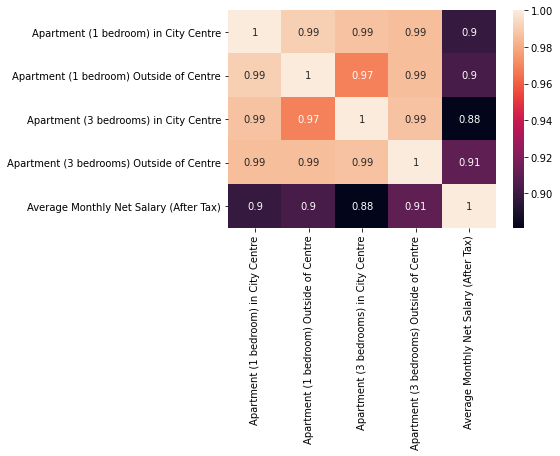

In [49]:
# Nuomos kainos stipriai koreliuoja su vidutiniu atlyginimu

sns.heatmap(Rent.corr(), annot=True)

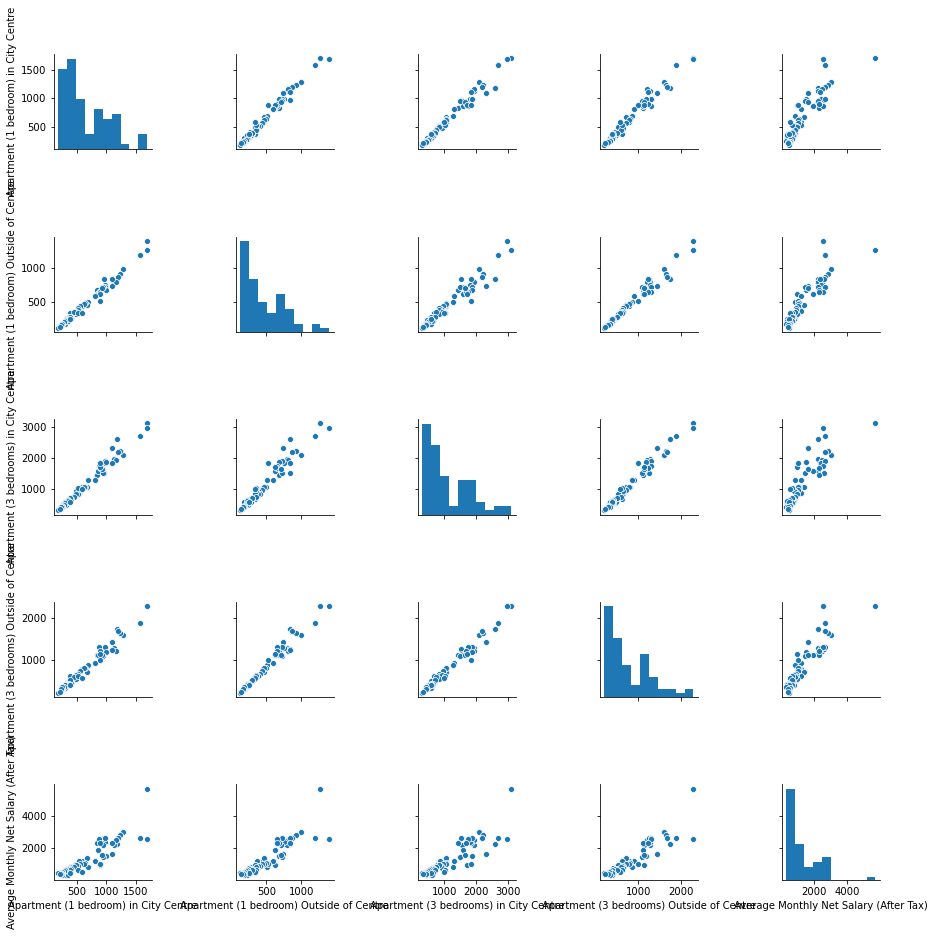

In [50]:
sns.pairplot(Rent)

In [51]:
# Restoranai

Restaurants = Europa[["Cappuccino (regular)", "Meal, Inexpensive Restaurant", 
                      "Meal for 2 People, Mid-range Restaurant, Three-course", "McMeal at McDonalds (or Equivalent Combo Meal)",
                      "Domestic Beer (0.5 liter draught)", "Imported Beer (0.33 liter bottle)", "Coke/Pepsi (0.33 liter bottle)",
                      "Water (0.33 liter bottle) ", "Average Monthly Net Salary (After Tax)"]].copy()

In [ ]:
Restaurants.corr()

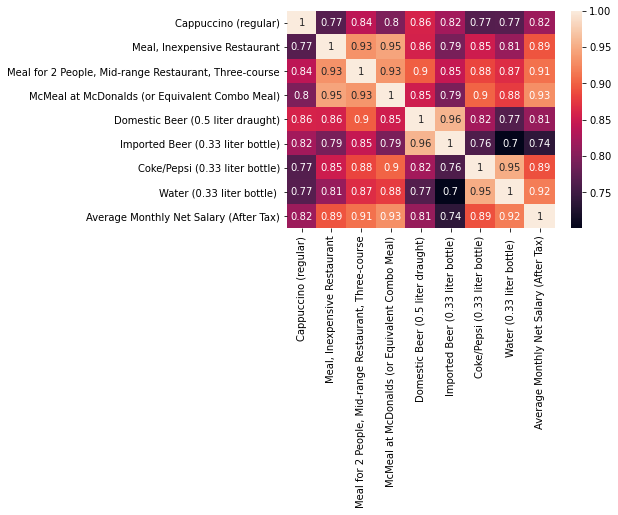

In [52]:
# Visos kainos stipriai koreliuoja su atlyginimu

sns.heatmap(Restaurants.corr(), annot=True)

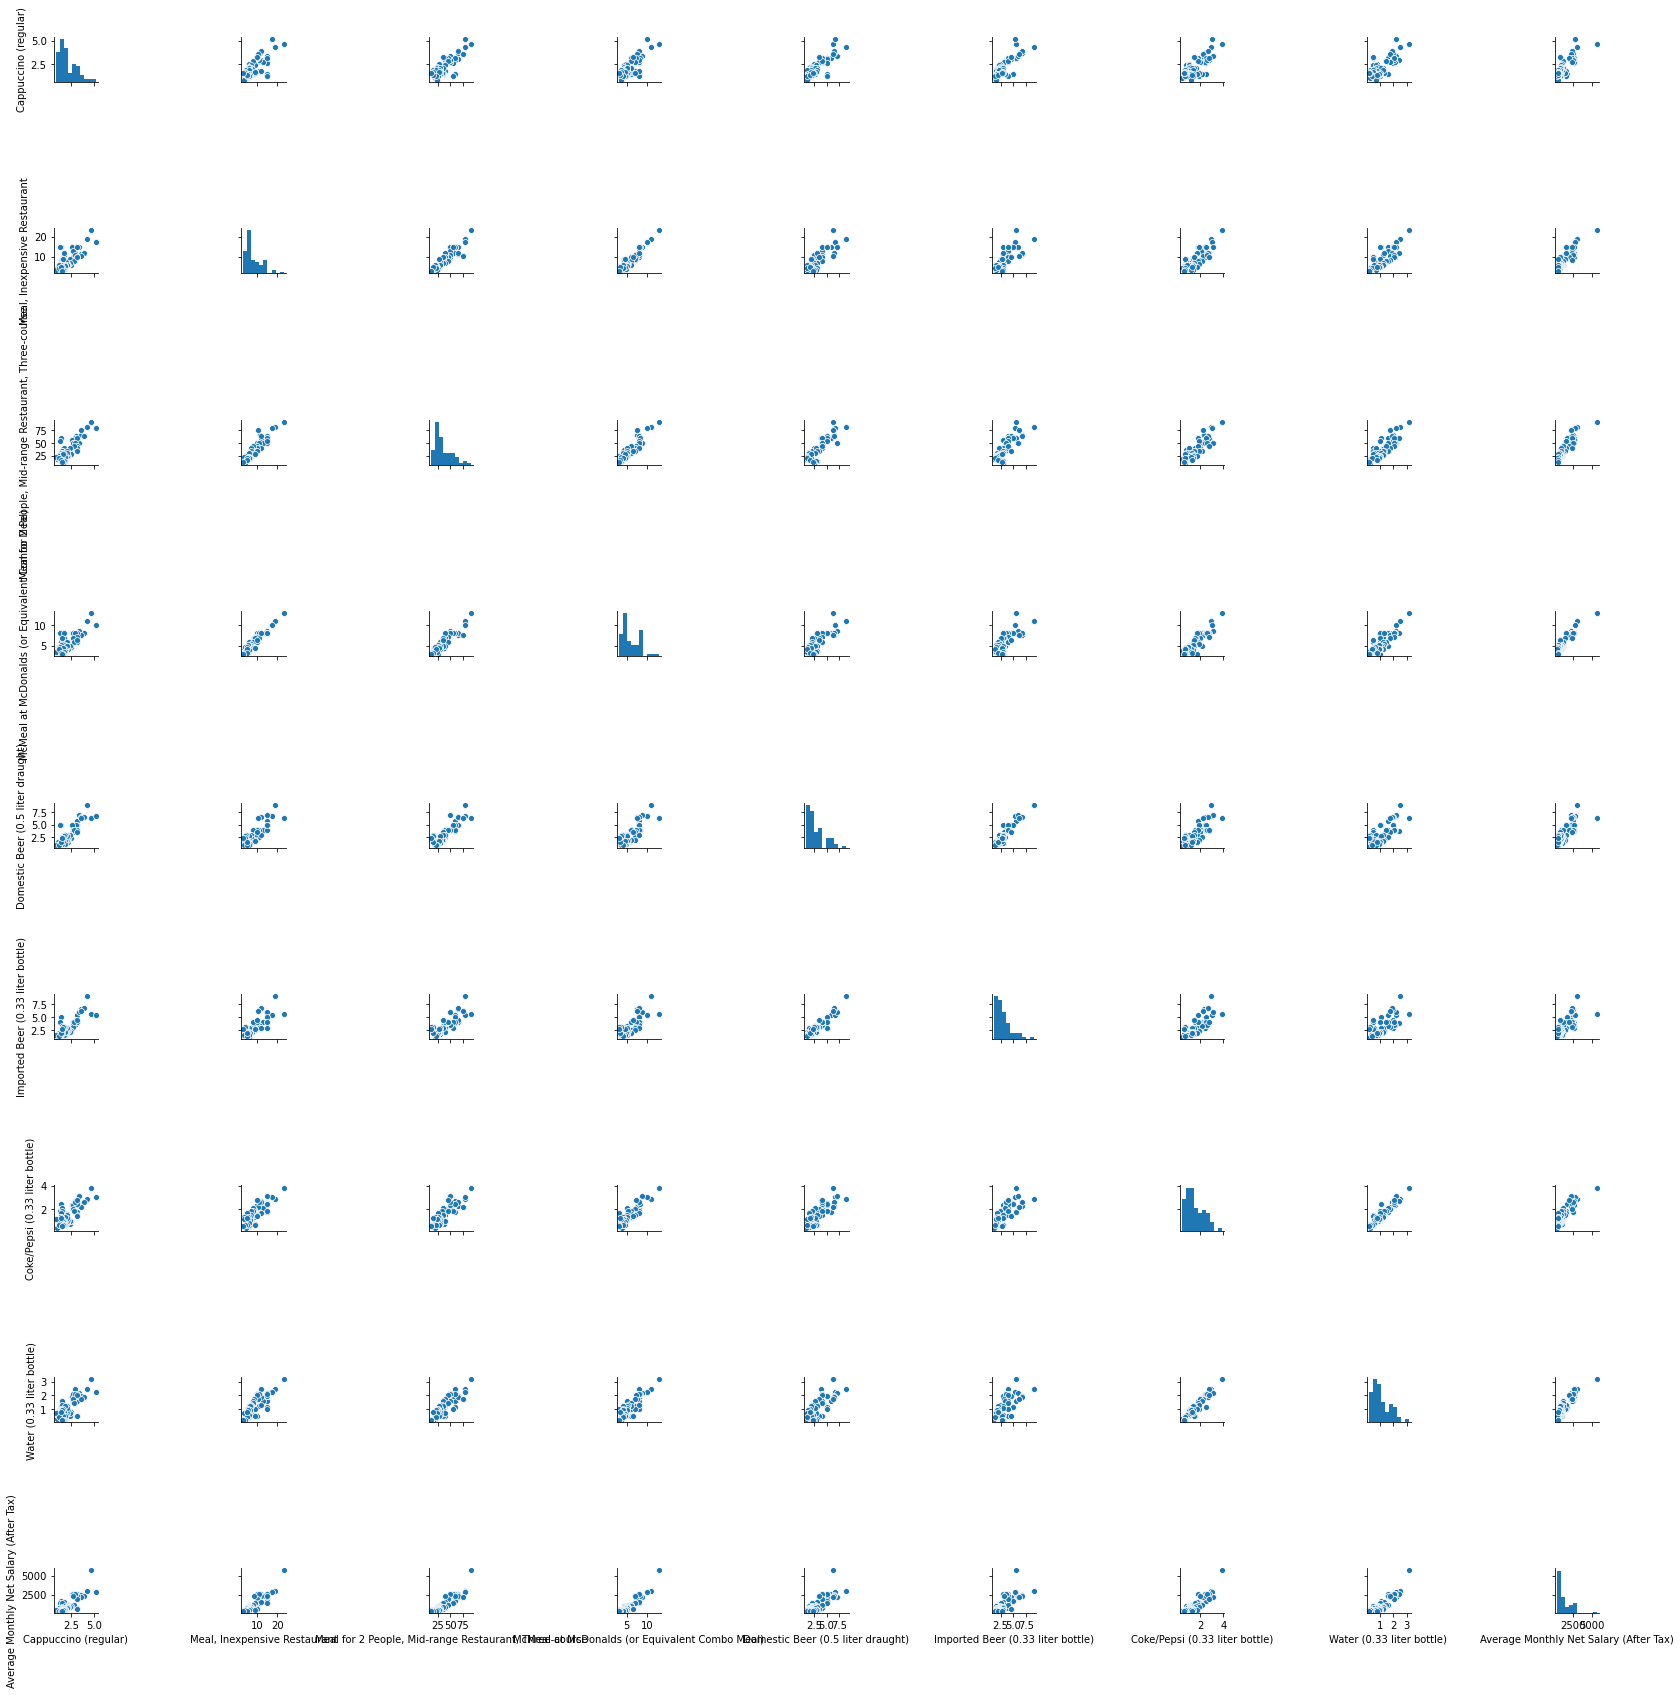

In [53]:
sns.pairplot(Restaurants)

In [ ]:
# Ar galima pritaikyti tiesinės regresijos modelį McMeal ir vid. atlyginimo prognozei? Jei taip kaip keičiasi McMeal kaina 
# keičiantis vidutiniam atlyginimui?

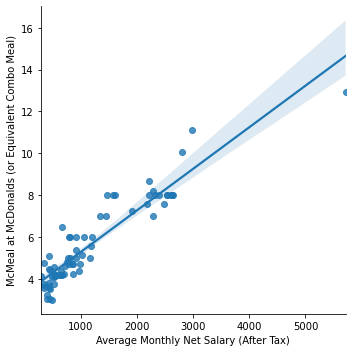

In [54]:
sns.lmplot(x="Average Monthly Net Salary (After Tax)", y="McMeal at McDonalds (or Equivalent Combo Meal)", data=Restaurants)

In [55]:
Restaurants["McMeal"] = Restaurants["McMeal at McDonalds (or Equivalent Combo Meal)"]  
Restaurants["Salary"] = Restaurants["Average Monthly Net Salary (After Tax)"]  

model = smf.ols(formula="McMeal ~ Salary", data=Restaurants).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 McMeal   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     454.4
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.50e-32
Time:                        17:52:00   Log-Likelihood:                -80.888
No. Observations:                  72   AIC:                             165.8
Df Residuals:                      70   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3091      0.143     23.069      0.0

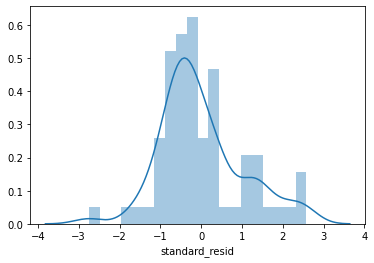

In [56]:
std_res = OLSInfluence(model).summary_frame()

# Standartizuotų liekanų (liekamųjų paklaidų) pasiskirstymas
sns.distplot(std_res["standard_resid"], bins=20)

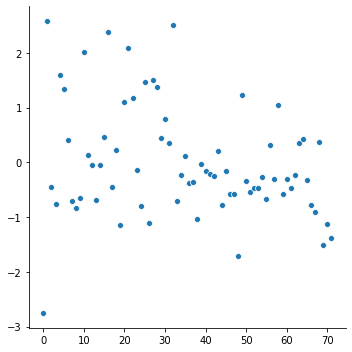

In [57]:
# Standartizuotų liekanų sklaidos diagrama
sns.relplot(data=std_res["standard_resid"])

In [58]:
# Hipotezė apie koeficiento b lygybę nuliui (priklausomybė tarp Y ir X)
model.pvalues

# p reikšmė mažiau už 0.05, todėl kintamieji statistiškai reikšmingi

Intercept    1.958602e-34
Salary       2.502675e-32
dtype: float64

In [59]:
model.get_prediction(pd.DataFrame({"Salary": [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 3000, 3500]})).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.301409,0.110750,4.080524,4.522293,2.780044,5.822773
1,4.797558,0.098669,4.600769,4.994347,3.279505,6.315611
2,5.293707,0.091044,5.112126,5.475288,3.777551,6.809863
3,5.789856,0.089027,5.612297,5.967416,4.274176,7.305536
4,6.286005,0.092985,6.100552,6.471459,4.769380,7.802630
5,6.782155,0.102226,6.578272,6.986038,5.263166,8.301143
6,7.278304,0.115488,7.047971,7.508637,5.755539,8.801069
7,7.774453,0.131561,7.512063,8.036843,6.246511,9.302395
8,8.270602,0.149541,7.972352,8.568853,6.736095,9.805109
9,9.262901,0.189002,8.885949,9.639853,7.711176,10.814626


In [60]:
Restaurants.sort_values(by='Average Monthly Net Salary (After Tax)', ascending=False)

,Cappuccino (regular),"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),Average Monthly Net Salary (After Tax),McMeal,Salary
0,4.66,23.12,92.46,12.94,6.24,5.55,3.87,3.21,5714.80,12.94,5714.80
1,4.28,18.70,80.88,11.12,9.00,9.10,2.92,2.51,2985.88,11.12,2985.88
4,5.21,17.40,80.29,10.04,6.69,5.35,3.02,2.22,2803.98,10.04,2803.98
3,3.13,15.00,65.00,8.00,5.00,4.00,2.35,1.96,2646.66,8.00,2646.66
7,2.98,12.00,60.00,8.00,3.80,3.90,2.73,2.44,2627.51,8.00,2627.51
...,...,...,...,...,...,...,...,...,...,...,...
53,1.19,5.65,20.67,3.67,0.94,1.20,0.57,0.42,360.47,3.67,360.47
59,1.15,3.75,18.76,3.56,1.50,1.50,0.48,0.37,341.38,3.56,341.38
60,1.03,4.50,18.76,3.75,0.88,1.29,0.38,0.29,337.40,3.75,337.40
58,1.20,4.10,24.62,4.76,1.27,2.00,1.07,0.54,336.43,4.76,336.43


In [61]:
#Pašalinam miestą su didžiausiu atlygimu

Restaurants1 = Restaurants.drop([0])

In [ ]:
Restaurants1.sort_values(by='Average Monthly Net Salary (After Tax)', ascending=False)

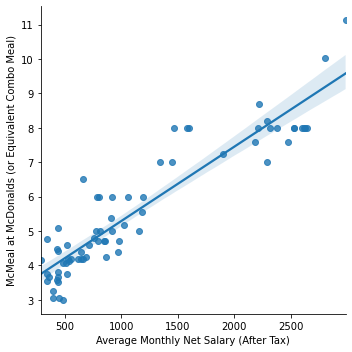

In [62]:
sns.lmplot(x="Average Monthly Net Salary (After Tax)", y="McMeal at McDonalds (or Equivalent Combo Meal)", data=Restaurants1)

In [63]:
Restaurants1["McMeal"] = Restaurants1["McMeal at McDonalds (or Equivalent Combo Meal)"]  
Restaurants1["Salary"] = Restaurants1["Average Monthly Net Salary (After Tax)"]  

model = smf.ols(formula="McMeal ~ Salary", data=Restaurants1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 McMeal   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     407.8
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.13e-30
Time:                        17:54:42   Log-Likelihood:                -76.188
No. Observations:                  71   AIC:                             156.4
Df Residuals:                      69   BIC:                             160.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1348      0.149     21.023      0.0

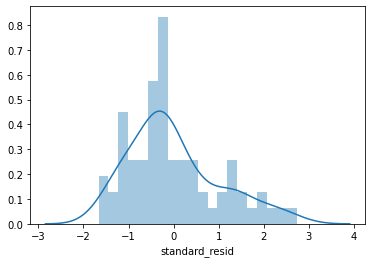

In [64]:
std_res = OLSInfluence(model).summary_frame()

# Standartizuotų liekanų (liekamųjų paklaidų) pasiskirstymas
sns.distplot(std_res["standard_resid"], bins=20)

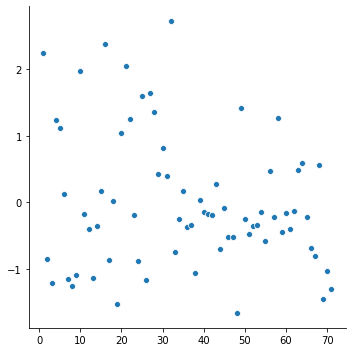

In [65]:
# Standartizuotų liekanų sklaidos diagrama
sns.relplot(data=std_res["standard_resid"])

In [66]:
model.get_prediction(pd.DataFrame({"Salary": [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 3000, 3500]})).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.213714,0.109597,3.995074,4.432354,2.765164,5.662264
1,4.753171,0.095084,4.563483,4.942859,3.308707,6.197634
2,5.292628,0.086590,5.119886,5.465370,3.850292,6.734964
3,5.832085,0.085917,5.660684,6.003485,4.389909,7.274261
4,6.371542,0.093236,6.185540,6.557543,4.927558,7.815526
5,6.910999,0.106918,6.697702,7.124295,5.463246,8.358751
6,7.450455,0.124889,7.201309,7.699602,5.996988,8.903923
7,7.989912,0.145568,7.699511,8.280313,6.528808,9.451017
8,8.529369,0.167959,8.194300,8.864439,7.058735,10.000004
9,9.608283,0.215714,9.177946,10.038620,8.113063,11.103503


In [ ]:
# Sportas ir laisvalaikis

In [67]:
Sports_And_Leisure = Europa[["Tennis Court Rent (1 Hour on Weekend)", "Fitness Club, Monthly Fee for 1 Adult",
                             "Cinema, International Release, 1 Seat", "Average Monthly Net Salary (After Tax)"]]

In [ ]:
#Sports_And_Leisure.corr()

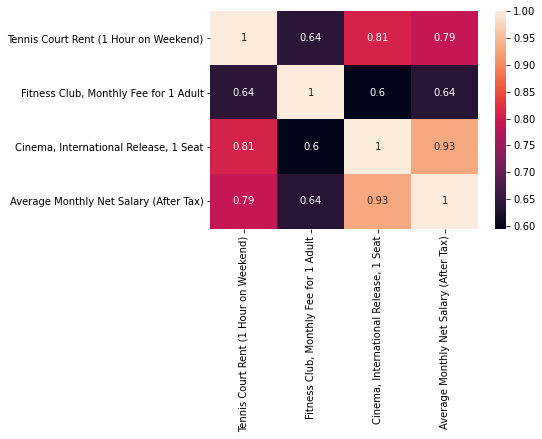

In [68]:
#Atlygnimas su fitneso klubo abonementu koreliuoja vidutiniškai, teniso kortais stipriai, o kino kainos labai stipriai

sns.heatmap(Sports_And_Leisure.corr(), annot=True)

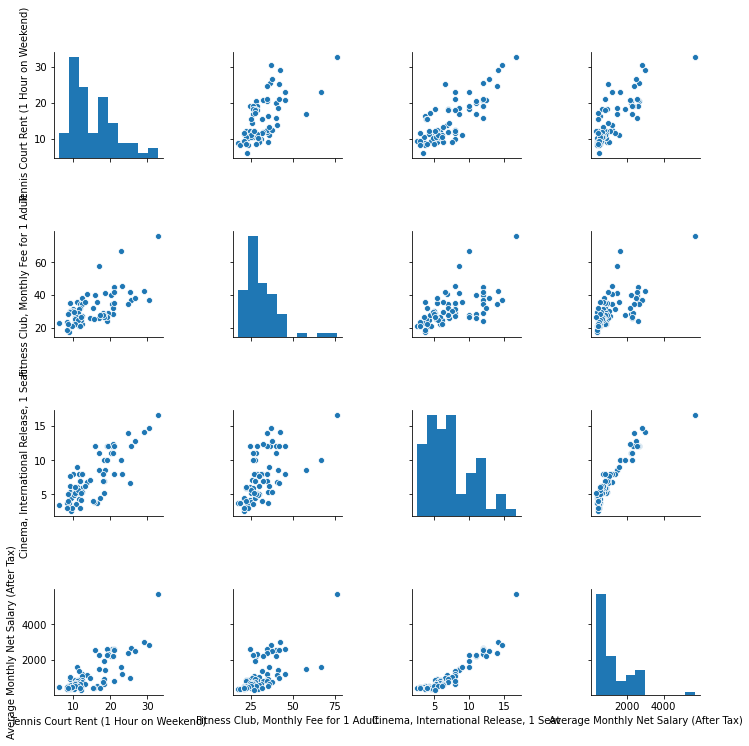

In [69]:
sns.pairplot(Sports_And_Leisure)

In [ ]:
# Transportas

In [70]:
Transportation = Europa[["Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)", "Gasoline (1 liter)",
                         "Monthly Pass (Regular Price)", "Volkswagen Golf", "Taxi 1hour Waiting (Normal Tariff)",
                         "Taxi 1km (Normal Tariff)", "Taxi Start (Normal Tariff)", "One-way Ticket (Local Transport)",
                         "Average Monthly Net Salary (After Tax)"]]

In [ ]:
Transportation.corr()

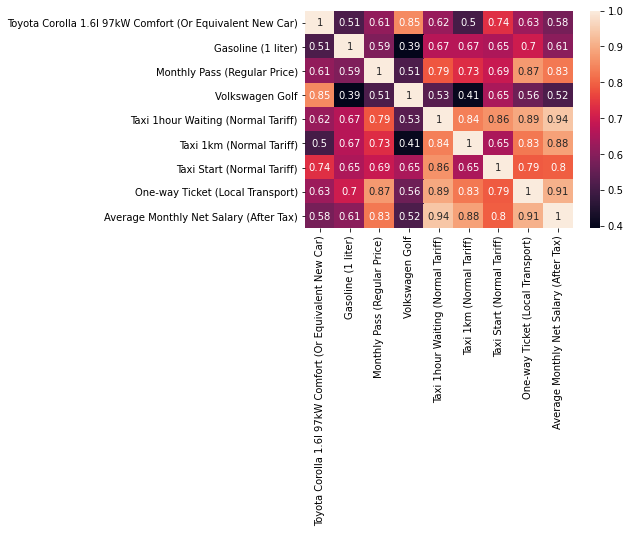

In [71]:
#Vidutiniškai koreliuoja Toyota Corolla, Golfo, benzino kainomis, su likusiomis kainomis koreliuoja stipriai

sns.heatmap(Transportation.corr(), annot=True)

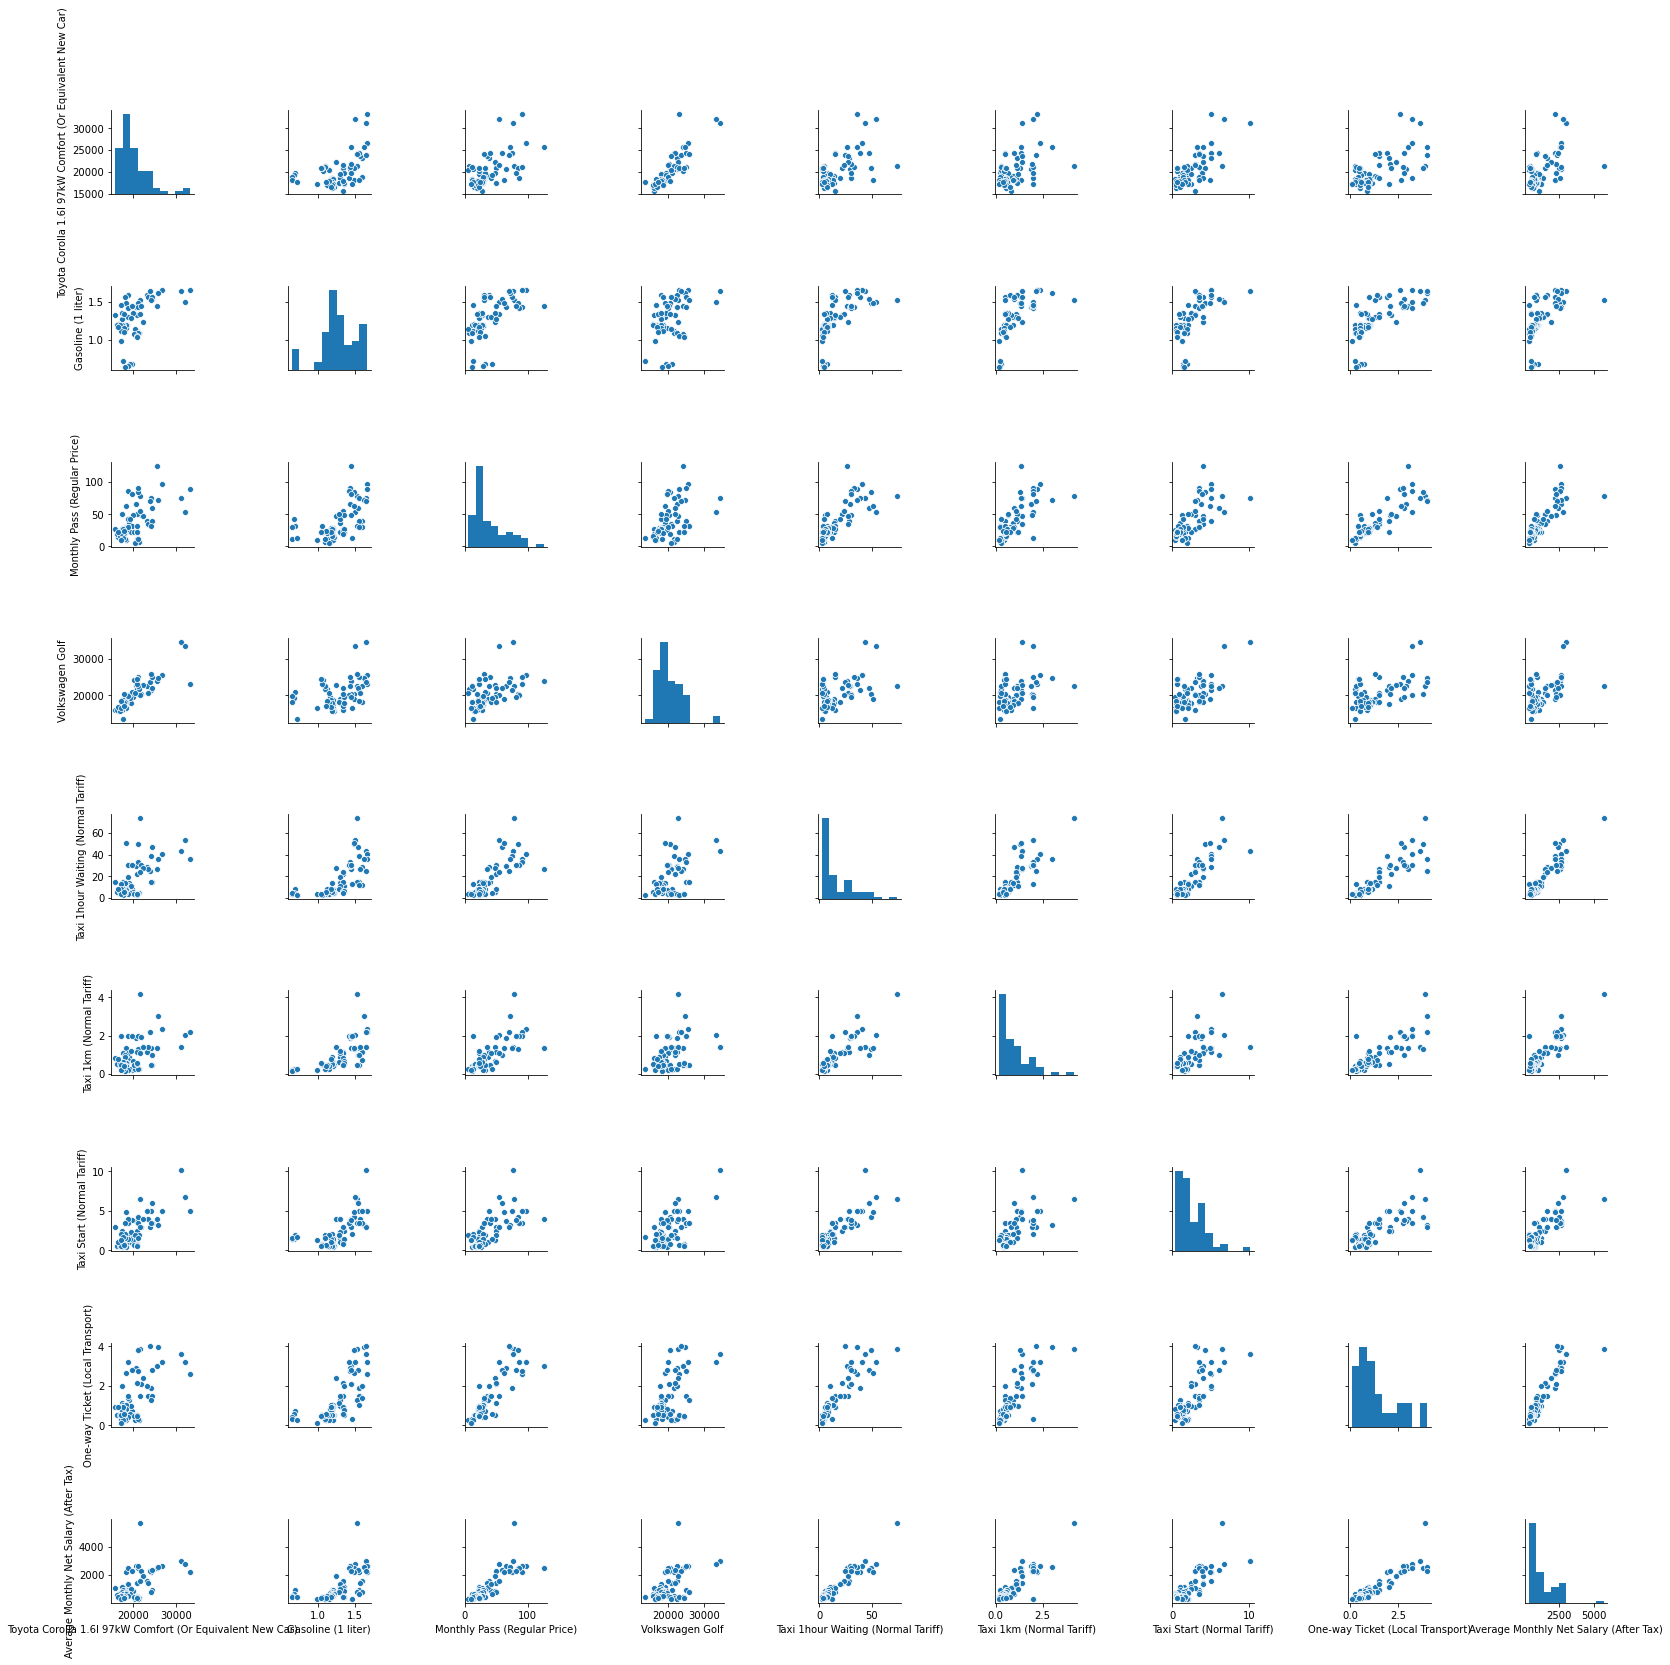

In [72]:
sns.pairplot(Transportation)

In [ ]:
# Komunalinės paslaugos

In [73]:
Utilities = data[["Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment", 
                  "1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)",
                  "Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)", "Average Monthly Net Salary (After Tax)"]]

In [ ]:
Utilities.corr()

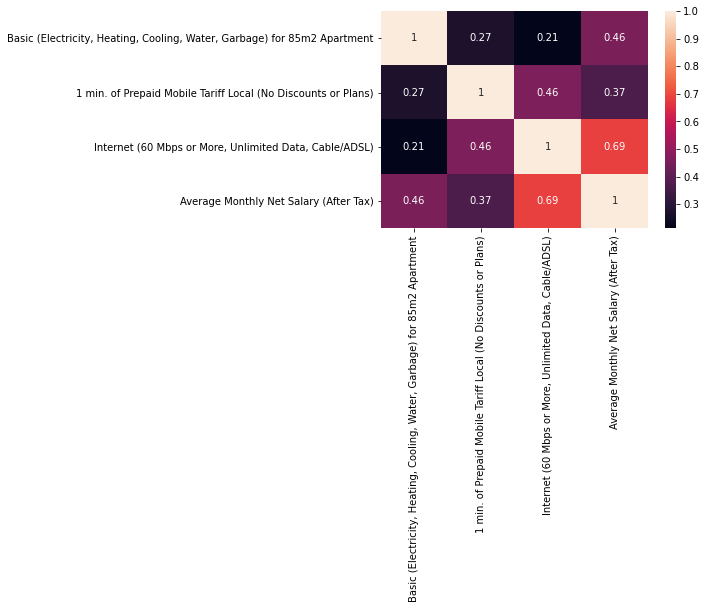

In [74]:
# Komunalinės paslaugos su vidutiniu atlyginimu koreliuoja silpniausiai palyginus su kitomis kainomis

sns.heatmap(Utilities.corr(), annot=True)

C:\Users\vaida\anaconda3\lib\site-packages\seaborn\axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


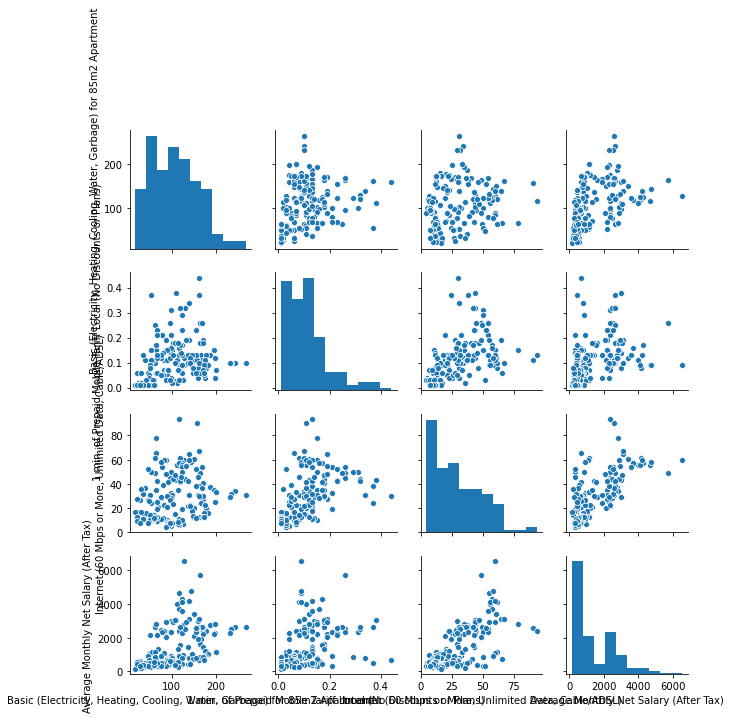

In [75]:
sns.pairplot(Utilities)

In [ ]:
# Ar nuomos kainos priklauso nuo gyventojų skaičiaus mieste?

In [76]:
# Įsikeliu gyventojų skaičių miestuose

miestai =  pd.read_excel('population_cities.xlsx')

miestai

,TIME,CITIES,Value
0,2019.0,Brussels,1215289
1,2019.0,Antwerpen,526439
2,2019.0,Gent,262205
3,2019.0,Charleroi,202637
4,2019.0,Ličge,383482
...,...,...,...
540,NaN,Zurich,341730
541,NaN,Ankara,3517182
542,NaN,Lviv,717803
543,NaN,Novosibirsk,1419007


In [77]:
# Pervadinu stulpelius

miestai = miestai.rename(columns={"CITIES": "City",
                                 "Value": "Population"})

In [78]:
# Pašalinu nereikalingą stulpelį

miestai =  miestai.drop('TIME', axis=1)

In [79]:
miestai

,City,Population
0,Brussels,1215289
1,Antwerpen,526439
2,Gent,262205
3,Charleroi,202637
4,Ličge,383482
...,...,...
540,Zurich,341730
541,Ankara,3517182
542,Lviv,717803
543,Novosibirsk,1419007


In [80]:
# Sujungiu lenteles pagal miestą

Europa1 = Europa.merge(miestai, on='City', how='left')

In [ ]:
Europa1

In [81]:
# Kokie miestai yra dataframe

Europa1['City'].unique()

array(['Zurich', 'Oslo', 'Dublin', 'Amsterdam', 'Copenhagen', 'Paris',
       'Utrecht', 'Munich', 'Stockholm', 'Eindhoven', 'Milan',
       'Rotterdam', 'Helsinki', 'Frankfurt', 'Gothenburg', 'Brussels',
       'Rome', 'Hamburg', 'Vienna', 'Berlin', 'Barcelona', 'Madrid',
       'Lisbon', 'Prague', 'Ljubljana', 'Porto', 'Moscow', 'Athens',
       'Valencia', 'Tallinn', 'Bratislava', 'Zagreb', 'Thessaloniki',
       'Warsaw', 'Brno', 'Riga', 'Krakow (Cracow)', 'Wroclaw', 'Gdansk',
       'Budapest', 'Vilnius', 'Poznan', 'Saint Petersburg', 'Kaunas',
       'Kiev', 'Sofia', 'Lodz', 'Bucharest', 'Podgorica', 'Belgrade',
       'Yekaterinburg', 'Cluj-Napoca', 'Istanbul', 'Odessa', 'Sarajevo',
       'Novosibirsk', 'Novi Sad', 'Brasov', 'Tirana', 'Lviv', 'Kharkiv',
       'Timisoara', 'Iasi', 'Plovdiv', 'Minsk', 'Varna', 'Banja Luka',
       'Ankara', 'Chisinau', 'Bursa', 'Skopje', 'Izmir'], dtype=object)

In [82]:
# Patikrinu ar nėra praleistų reikšmių

filtered_df = Europa1[Europa1['Population'].isnull()]

filtered_df

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Drinks at Home,Car and Gasoline,Public Transport and Taxi,Leisure and Sport Memberships,Utilities,Rent,Other Goods and Services,Overall estimate monthly spending,Is avarage salary enough,Population


In [83]:
Nuoma = Europa1[["Apartment (1 bedroom) in City Centre", "Apartment (1 bedroom) Outside of Centre",
                 "Apartment (3 bedrooms) in City Centre", "Apartment (3 bedrooms) Outside of Centre", 
                 "Average Monthly Net Salary (After Tax)", "Population"]].copy()

In [ ]:
Nuoma.corr()

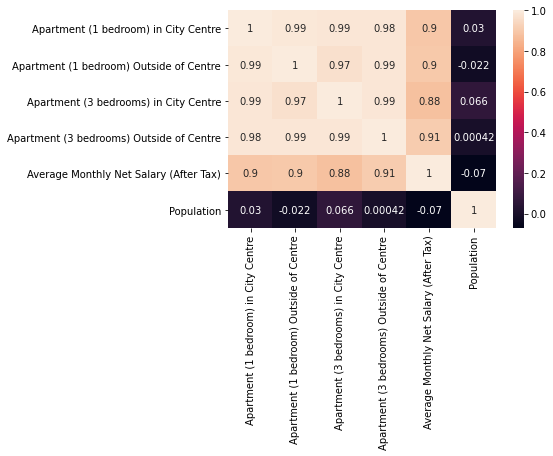

In [84]:
# Labai silpna nuomos kainų ir gyventojaus skaičiaus mieste koreliacija

sns.heatmap(Nuoma.corr(), annot=True)

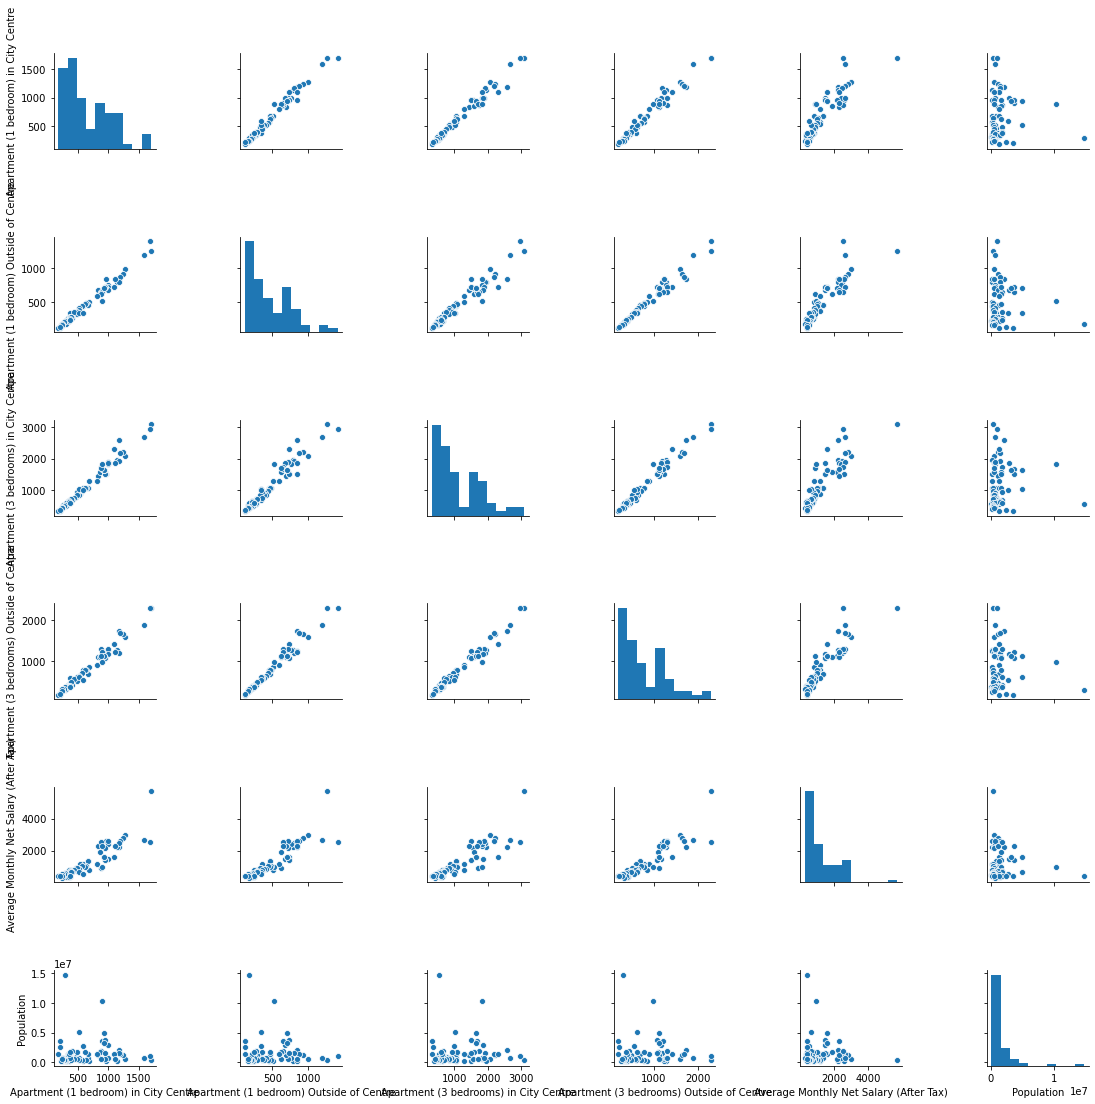

In [85]:
sns.pairplot(Nuoma)

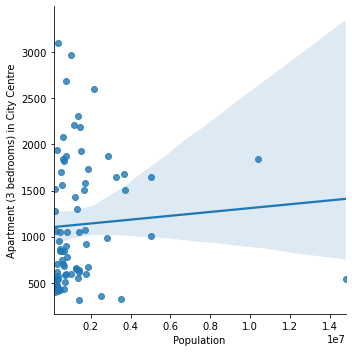

In [86]:
sns.lmplot(x='Population', y='Apartment (3 bedrooms) in City Centre', data=Nuoma)

In [87]:
Nuoma["Apartment"] = Nuoma["Apartment (3 bedrooms) in City Centre"]  

model = smf.ols(formula="Apartment ~ Population", data=Nuoma).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Apartment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.3171
Date:                Sun, 08 Nov 2020   Prob (F-statistic):              0.575
Time:                        18:02:14   Log-Likelihood:                -595.64
No. Observations:                  75   AIC:                             1195.
Df Residuals:                      73   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1101.4643     96.685     11.392      0.0

In [ ]:
# p reikšmė 0.575 todėl populiacijos kintamasis regresijos modelyje nėra statistiškai reikšmas ir šis modelis paaiškina tik
# 0.4 % variacijos. 